In [17]:
import pandas as pd
import math as math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
data = pd.read_csv("data.csv",engine='python', delimiter=';')

In [5]:
data = data.fillna('Пропустили вопрос').replace({'Высшее, бакалавр или специалист':'Высшее',
                                              'Высшее, магистр':'Высшее',
                                              'Кандидат наук, доктор наук': 'Высшее',
                                              'Два и более высших образований':'Высшее',
                                              'Среднее профессиональное (например, колледж или техникум)': 'Без высшего',
                                              'Неоконченное высшее':'Без высшего',
                                              'Начальное профессиональное (например, профессиональное училище)': 'Без высшего',
                                              'Среднее (полное) общее или ниже': 'Без высшего',
                                              'Затрудняюсь ответить': 'Пропустили вопрос',
                                                'Нет, но есть детская комната, которую он делит с братом/сестрой (братьями, сестрами)':'Нет, делит с братом/сестрой',
                                                'Нет, ребенок живет в одной комнате со взрослыми родственниками': 'Нет, живет со взрослыми'
                                                })

In [6]:
data_mom_edu = data.loc[data['q86mom_edu'] != 'Пропустили вопрос']

,q48,q49,q50,q51,q52,q53_1,q53_2,q53_3,q53other1,q53other2,q53other3,q54,q55,q55_2,q56h,q56min,q57_1,q57_2,q57_3,q57_4
2,Да,Да,Да,Было до ситуации с коронавирусом,В личном пользовании ребенка,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Да,Знаю,Пропустили вопрос,6,Пропустили вопрос,Увеличилось,Увеличилось,Уменьшилось,Уменьшилось
3,Да,Да,Да,Было до ситуации с коронавирусом,В личном пользовании ребенка,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Да,Знаю,Пропустили вопрос,6,Пропустили вопрос,Не изменилось,Увеличилось,Не изменилось,Не изменилось
4,Да,Да,Да,Было до ситуации с коронавирусом,Пользуются другие члены семьи,Пропустили вопрос,"Члены семьи, которым нужно это устройство для ...",Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Да,Знаю,Пропустили вопрос,4,0,Не изменилось,Увеличилось,Не изменилось,Уменьшилось


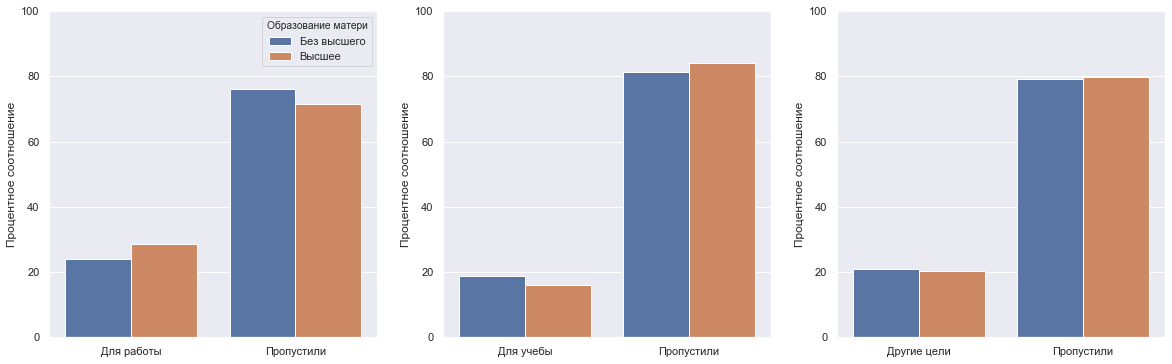

In [105]:
# №2 Вопрос 53
sns.set(style='darkgrid')
fig, ax = plt.subplots(1,3)
plt.rcParams['figure.figsize'] = [20, 6]

y= 'prop'
prop_df = (data_mom_edu['q53_1']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g = sns.barplot(x='q53_1',y='Процентное соотношение',hue='q86mom_edu', 
                data=prop_df,ax=ax[0], order = ['Члены семьи, которым нужно это устройство для работы','Пропустили вопрос'])
g.set(ylim=(0, 100))
g.set_xticklabels(['Для работы','Пропустили'])
g.set_xlabel('')
g.legend_.set_title('Образование матери')

prop_df = (data_mom_edu['q53_2']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g1 = sns.barplot(x='q53_2',y='Процентное соотношение',hue='q86mom_edu', data=prop_df,ax=ax[1],
                 order = ['Члены семьи, которым нужно это устройство для учебы','Пропустили вопрос'])
g1.set(ylim=(0, 100))
g1.set_xticklabels(['Для учебы','Пропустили'])
g1.set_xlabel('')
g1.legend_.remove()

prop_df = (data_mom_edu['q53_3']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g2 = sns.barplot(x='q53_3',y='Процентное соотношение',hue='q86mom_edu', data=prop_df,ax=ax[2],
                  order = ['Члены семьи, которые используют это устройство для других целей (не связанных с работой или обучением)','Пропустили вопрос'])
g2.set(ylim=(0, 100))
g2.set_xticklabels(['Другие цели','Пропустили'])
g2.set_xlabel('')
g2.legend_.remove()

In [229]:
prop_df1 = (data_mom_edu['q53_1']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df1['Процентное соотношение'] = prop_df['prop']*100

prop_df2 = (data_mom_edu['q53_2']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df2['Процентное соотношение'] = prop_df['prop']*100

prop_df3 = (data_mom_edu['q53_3']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df3['Процентное соотношение'] = prop_df['prop']*100

prop_df4 = (data_mom_edu['q53_miss']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df4['Процентное соотношение'] = prop_df['prop']*100

In [233]:
prop_df1_sliced = prop_df1.iloc[[1,3],:].rename(columns={"q53_1": "q53"})
prop_df2_sliced = prop_df2.iloc[[1,3],:].rename(columns={"q53_2": "q53"})
prop_df3_sliced = prop_df3.iloc[[1,3],:].rename(columns={"q53_3": "q53"})
prop_df4_sliced = prop_df4.rename(columns={"q53_miss": "q53"})
frames = [prop_df1_sliced, prop_df2_sliced, prop_df3_sliced]
result = pd.concat(frames)
result['Процентное соотношение'] = result['prop']*100 
result1 = pd.concat([result, prop_df4_sliced])

In [206]:
def classifier(row):
    if (row['q53_1'] == 'Пропустили вопрос') & (row['q53_2'] == 'Пропустили вопрос') & (row['q53_3'] == 'Пропустили вопрос'):
        return "Пропустили вопрос"
data_mom_edu['q53_miss'] = data_mom_edu.apply(classifier, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


[(0, 100)]

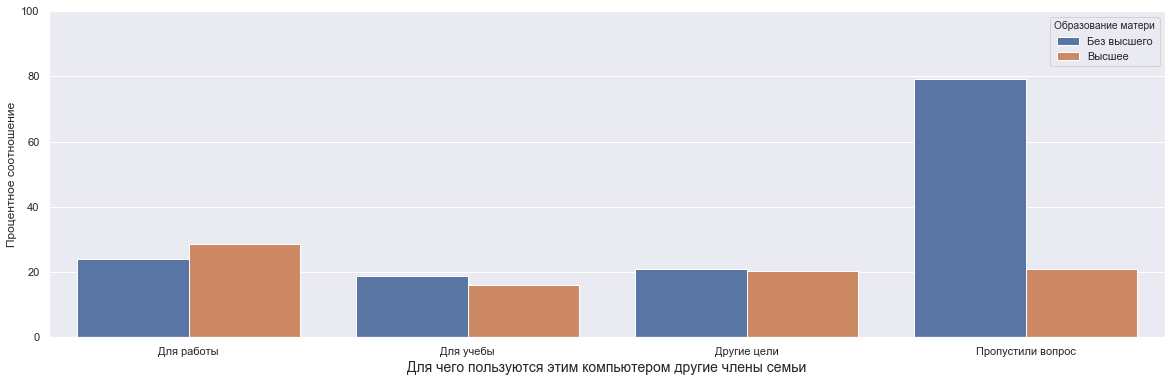

In [207]:
g = sns.barplot(x='q53',y='Процентное соотношение',hue='q86mom_edu', 
                data=result1)
g.set_xticklabels(['Для работы','Для учебы', 'Другие цели', 'Пропустили вопрос'])
g.legend_.set_title('Образование матери')
g.set_xlabel('Для чего пользуются этим компьютером другие члены семьи',fontsize=14)

g.set(ylim=(0, 100))

In [214]:
data_mom_edu.iloc[0:3,230:245]

,q43_1,q43_2,q43_3,q43_4,q43_5,q43_6,q43_7,q43_8,q43_9,q43_10,q44_1,q44_2,q44_3,q44_4,q44_5
2,Ел,Ложился спать,Был на уроках или дополнительных занятиях,Делал домашнюю работу,"Чистил зубы, соблюдал гигиену",Я слежу за соблюдением всего режима дня,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,1,1,0 (никогда),3,3
3,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Я слежу за соблюдением всего режима дня,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,0 (никогда),0 (никогда),0 (никогда),6 (постоянно),5
4,Ел,Ложился спать,Пропустили вопрос,Пропустили вопрос,"Чистил зубы, соблюдал гигиену",Я слежу за соблюдением всего режима дня,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,0 (никогда),1,1,5,3


In [294]:
prop_df1 = (data_mom_edu['q43_1']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df1['Процентное соотношение'] = prop_df['prop']*100

prop_df2 = (data_mom_edu['q43_2']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df2['Процентное соотношение'] = prop_df['prop']*100

prop_df3 = (data_mom_edu['q43_3']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df3['Процентное соотношение'] = prop_df['prop']*100

prop_df4 = (data_mom_edu['q43_4']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df4['Процентное соотношение'] = prop_df['prop']*100

prop_df5 = (data_mom_edu['q43_5']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df5['Процентное соотношение'] = prop_df['prop']*100

prop_df6 = (data_mom_edu['q43_6']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df6['Процентное соотношение'] = prop_df['prop']*100

prop_df7 = (data_mom_edu['q43_7']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df7['Процентное соотношение'] = prop_df['prop']*100

prop_df8 = (data_mom_edu['q43_miss']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df8['Процентное соотношение'] = prop_df['prop']*100

In [296]:
prop_df1_sliced = prop_df1.iloc[[1,2],:].rename(columns={"q43_1": "q43"})
prop_df2_sliced = prop_df2.iloc[[0,2],:].rename(columns={"q43_2": "q43"})
prop_df3_sliced = prop_df3.iloc[[0,2],:].rename(columns={"q43_3": "q43"})
prop_df4_sliced = prop_df4.iloc[[0,2],:].rename(columns={"q43_4": "q43"})
prop_df5_sliced = prop_df5.iloc[[1,3],:].rename(columns={"q43_5": "q43"})
prop_df6_sliced = prop_df6.iloc[[0,2],:].rename(columns={"q43_6": "q43"})
prop_df7_sliced = prop_df7.iloc[[1,3],:].rename(columns={"q43_7": "q43"})
prop_df8_sliced = prop_df8.rename(columns={"q43_miss": "q43"})
frames = [prop_df1_sliced, prop_df2_sliced, prop_df3_sliced, prop_df4_sliced,
         prop_df5_sliced, prop_df6_sliced, prop_df7_sliced]
result = pd.concat(frames)
result['Процентное соотношение'] = result['prop']*100 
result1 = pd.concat([result, prop_df8_sliced])

In [268]:
def classifier43(row):
    if (row['q43_1'] == 'Пропустили вопрос') & (row['q43_2'] == 'Пропустили вопрос') & (row['q43_3'] == 'Пропустили вопрос') & (row['q43_4'] == 'Пропустили вопрос') & (row['q43_5'] == 'Пропустили вопрос') & (row['q43_6'] == 'Пропустили вопрос') & (row['q43_7'] == 'Пропустили вопрос'):
        return "Пропустили вопрос"
data_mom_edu['q43_miss'] = data_mom_edu.apply(classifier43, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


[(0, 100)]

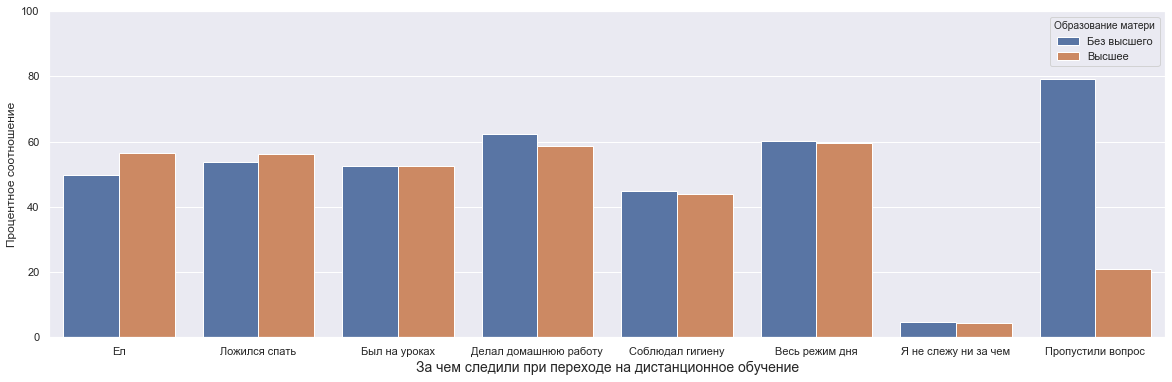

In [300]:
g = sns.barplot(x='q43',y='Процентное соотношение',hue='q86mom_edu', 
                data=result1)
g.set_xticklabels(['Ел','Ложился спать', 'Был на уроках', 'Делал домашнюю работу', 'Cоблюдал гигиену',
                   'Весь режим дня', 'Я не слежу ни за чем', 'Пропустили вопрос'])
g.legend_.set_title('Образование матери')
g.set_xlabel('За чем следили при переходе на дистанционное обучение',fontsize=14)

g.set(ylim=(0, 100))

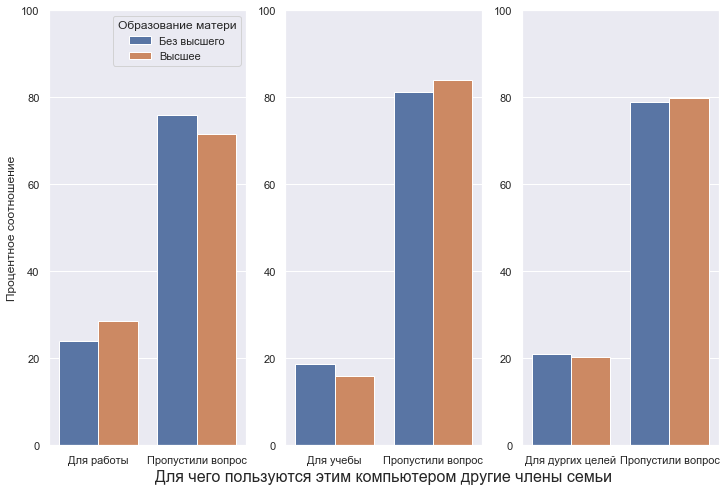

In [326]:
# 2 Вопрос 53

fig, ax =plt.subplots(1,3)
plt.rcParams['figure.figsize'] = [12, 8]

prop_df = (data_mom_edu['q53_1']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g = sns.barplot(x='q53_1',y='Процентное соотношение',hue='q86mom_edu',data=prop_df,
                order = ['Члены семьи, которым нужно это устройство для работы', 'Пропустили вопрос'],
                ax=ax[0])
g.set(ylim=(0, 100))
g.legend(title='Образование матери')
g.set_xlabel('',fontsize=14)
g.set_xticklabels(['Для работы', 'Пропустили вопрос', ])

prop_df = (data_mom_edu['q53_2']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g1 = sns.barplot(x='q53_2',y='Процентное соотношение',hue='q86mom_edu',data=prop_df,
                 order = ['Члены семьи, которым нужно это устройство для учебы', 'Пропустили вопрос'],
                 ax=ax[1])
g1.set(ylim=(0, 100))

g1.legend(title='Образование матери')
g1.set_xlabel('Для чего пользуются этим компьютером другие члены семьи',fontsize=16)
g1.set_xticklabels(['Для учебы', 'Пропустили вопрос', ])
g1.set_ylabel('') 
g1.legend_.remove()

prop_df = (data_mom_edu['q53_3']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g2 = sns.barplot(x='q53_3',y='Процентное соотношение',hue='q86mom_edu',data=prop_df,
                 order = ['Члены семьи, которые используют это устройство для других целей (не связанных с работой или обучением)', 'Пропустили вопрос'],
                 ax=ax[2])
g2.set(ylim=(0, 100))
g2.legend(title='Образование матери')
g2.set_xlabel('',fontsize=14)
g2.set_xticklabels(['Для дургих целей', 'Пропустили вопрос', ])
g2.set_ylabel('') 
g2.legend_.remove()

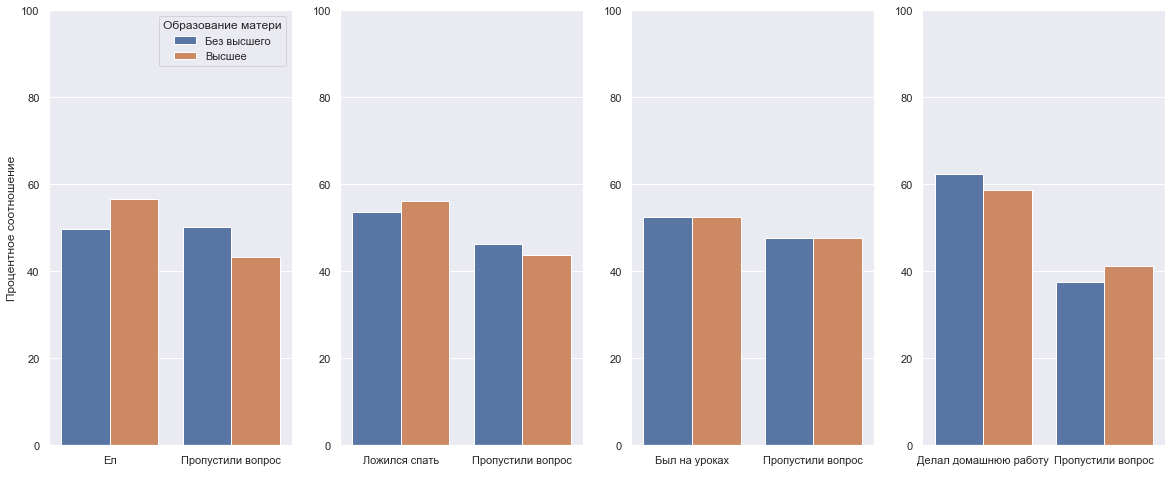

In [366]:
#3 Вопрос 43

fig, ax =plt.subplots(1,4)
plt.rcParams['figure.figsize'] = [20, 8]

prop_df = (data_mom_edu['q43_1']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g = sns.barplot(x='q43_1',y='Процентное соотношение',hue='q86mom_edu',data=prop_df,
               order = ['Ел', 'Пропустили вопрос'],
                ax=ax[0])
g.set(ylim=(0, 100))
g.legend(title='Образование матери')
g.set_xlabel('',fontsize=14)
g.set_xticklabels(['Ел', 'Пропустили вопрос'])

prop_df = (data_mom_edu['q43_2']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g1 = sns.barplot(x='q43_2',y='Процентное соотношение',hue='q86mom_edu',data=prop_df,
                 order = ['Ложился спать', 'Пропустили вопрос'],
                 ax=ax[1])
g1.set(ylim=(0, 100))

g1.legend(title='Образование матери')
g1.set_xlabel(' ',fontsize=16)
#g1.set_xticklabels(['Ложился спать', 'Пропустили вопрос', ])
g1.set_ylabel('') 
g1.legend_.remove()

prop_df = (data_mom_edu['q43_3']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g2 = sns.barplot(x='q43_3',y='Процентное соотношение',hue='q86mom_edu',data=prop_df,
                 order = ['Был на уроках или дополнительных занятиях', 'Пропустили вопрос'],
                 ax=ax[2])
g2.set(ylim=(0, 100))
g2.legend(title='Образование матери')
g2.set_xlabel('',fontsize=14)
g2.set_xticklabels(['Был на уроках', 'Пропустили вопрос', ])
g2.set_ylabel('') 
g2.legend_.remove()

prop_df = (data_mom_edu['q43_4']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g3 = sns.barplot(x='q43_4',y='Процентное соотношение',hue='q86mom_edu',data=prop_df,
                 order = ['Делал домашнюю работу', 'Пропустили вопрос'],
                 ax=ax[3])
g3.set(ylim=(0, 100))
g3.legend(title='Образование матери')
g3.set_xlabel('',fontsize=14)
g3.set_xticklabels(['Делал домашнюю работу', 'Пропустили вопрос', ])
g3.set_ylabel('') 
g3.legend_.remove()



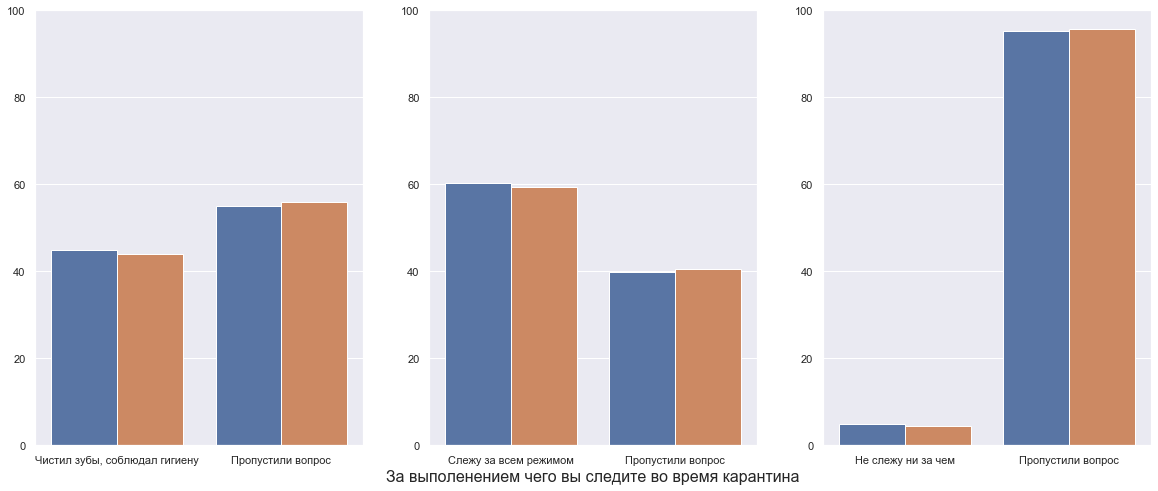

In [375]:
fig, ax =plt.subplots(1,3)
plt.rcParams['figure.figsize'] = [20, 8]

prop_df = (data_mom_edu['q43_5']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g4 = sns.barplot(x='q43_5',y='Процентное соотношение',hue='q86mom_edu',data=prop_df,
                 order = ['Чистил зубы, соблюдал гигиену', 'Пропустили вопрос'],
                 ax=ax[0])
g4.set(ylim=(0, 100))
g4.legend(title='Образование матери')
g4.set_xlabel('',fontsize=14)
#g2.set_xticklabels(['Для дургих целей', 'Пропустили вопрос', ])
g4.set_ylabel('') 
g4.legend_.remove()

prop_df = (data_mom_edu['q43_6']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g5 = sns.barplot(x='q43_6',y='Процентное соотношение',hue='q86mom_edu',data=prop_df,
                 order = ['Я слежу за соблюдением всего режима дня', 'Пропустили вопрос'],
                 ax=ax[1])
g5.set(ylim=(0, 100))
g5.legend(title='Образование матери')
g5.set_xlabel('',fontsize=14)
g5.set_xticklabels(['Слежу за всем режимом', 'Пропустили вопрос', ])
g5.set_xlabel('За выполенением чего вы следите во время карантина',fontsize=16)
g5.set_ylabel('') 
g5.legend_.remove()

prop_df = (data_mom_edu['q43_7']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g6 = sns.barplot(x='q43_7',y='Процентное соотношение',hue='q86mom_edu',data=prop_df,
                 order = ['Я не слежу ни за чем', 'Пропустили вопрос'],
                 ax=ax[2])
g6.set(ylim=(0, 100))
g6.legend(title='Образование матери')
g6.set_xlabel('',fontsize=14)
g6.set_xticklabels(['Не слежу ни за чем', 'Пропустили вопрос', ])
g6.set_ylabel('') 
g6.legend_.remove()

In [422]:
data_mom_edu.iloc[0:3,58:78]

,q9platforms_found_didnt_use,q9books_found_for_edu,q9books_found_to_test,q9books_found_for_add_edu,q9books_found_didnt_use,q9other_found_for_edu,q9other_found_to_test,q9other_found_for_add_edu,q9other_found_didnt_use,q10control_homework,q10interesting,q10help,q10talk,q10plans,q10friends,q10explain,q10help_homework,q10platforms,q10dop,q11control_homework
2,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,"Для дополнительного образования (то, что не вк...",Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Раз в 1 или в 2 недели,Несколько раз в неделю,Раз в месяц и реже,Ежедневно,Ежедневно,Ежедневно,Раз в месяц и реже,Раз в месяц и реже,Раз в 1 или в 2 недели,Раз в месяц и реже,Несколько раз в неделю
3,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Не использовали,Пропустили вопрос,Для тестирования и оценки уровня знаний ребенка,"Для дополнительного образования (то, что не вк...",Пропустили вопрос,Ежедневно,Несколько раз в неделю,Несколько раз в неделю,Ежедневно,Ежедневно,Ежедневно,Несколько раз в неделю,Раз в 1 или в 2 недели,Раз в месяц и реже,Раз в месяц и реже,Ежедневно
4,Не использовали,Пропустили вопрос,Пропустили вопрос,"Для дополнительного образования (то, что не вк...",Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Не использовали,Никогда,Ежедневно,Несколько раз в неделю,Ежедневно,Ежедневно,Несколько раз в неделю,Раз в 1 или в 2 недели,Раз в 1 или в 2 недели,Никогда,Раз в 1 или в 2 недели,Никогда


Text(-5, -12, 'Другие материалы, задания, которые Вы нашли в интернете самостоятельно')

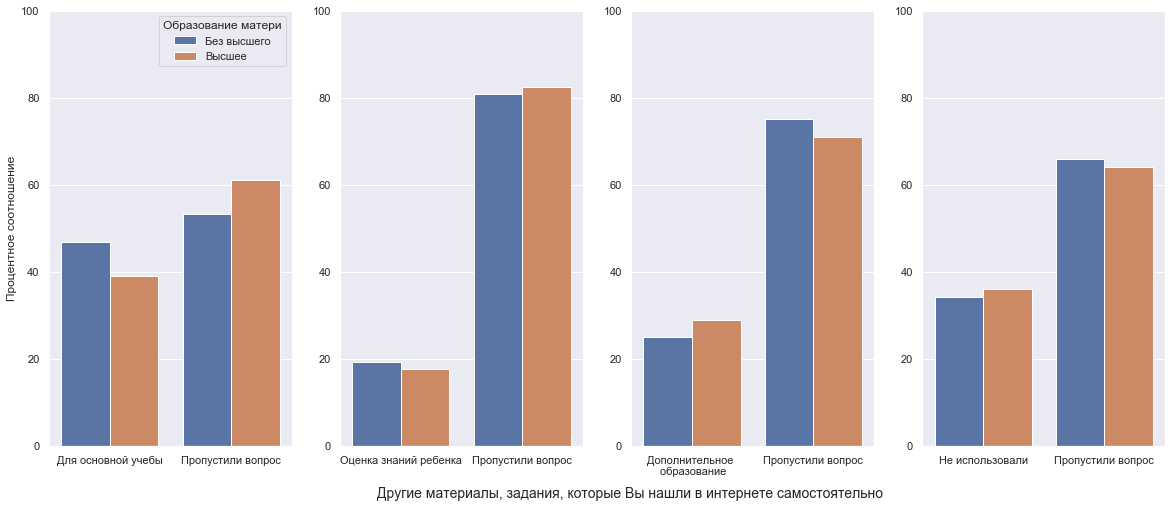

In [426]:
#5 Вопрос 9 (1)

fig, ax =plt.subplots(1,4)
plt.rcParams['figure.figsize'] = [20, 8]

prop_df = (data_mom_edu['q9other_found_for_edu']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g = sns.barplot(x='q9other_found_for_edu',y='Процентное соотношение',hue='q86mom_edu',data=prop_df,
                order = ['Для основной учебы (то, что ребенок проходит по школьной программе)', 'Пропустили вопрос'],
                ax=ax[0])
g.set(ylim=(0, 100))
g.legend(title='Образование матери')
g.set_xlabel('',fontsize=14)
g.set_xticklabels(['Для основной учебы', 'Пропустили вопрос'])

prop_df = (data_mom_edu['q9other_found_to_test']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g1 = sns.barplot(x='q9other_found_to_test',y='Процентное соотношение',hue='q86mom_edu',data=prop_df,
                 order = ['Для тестирования и оценки уровня знаний ребенка', 'Пропустили вопрос'],
                 ax=ax[1])
g1.set(ylim=(0, 100))

g1.legend(title='Образование матери')
g1.set_xlabel(' ',fontsize=16)
g1.set_xticklabels(['Оценка знаний ребенка', 'Пропустили вопрос', ])
g1.set_ylabel('') 
g1.legend_.remove()

prop_df = (data_mom_edu['q9other_found_for_add_edu']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g2 = sns.barplot(x='q9other_found_for_add_edu',y='Процентное соотношение',hue='q86mom_edu',data=prop_df,
                 order = ['Для дополнительного образования (то, что не включено в школьную программу)', 'Пропустили вопрос'],
                 ax=ax[2])
g2.set(ylim=(0, 100))
g2.legend(title='Образование матери')
g2.set_xlabel('',fontsize=14)
g2.set_xticklabels(['Дополнительное \n образование', 'Пропустили вопрос', ])
g2.set_ylabel('') 
g2.legend_.remove()

prop_df = (data_mom_edu['q9other_found_didnt_use']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g3 = sns.barplot(x='q9other_found_didnt_use',y='Процентное соотношение',hue='q86mom_edu',data=prop_df,
                 order = ['Не использовали', 'Пропустили вопрос'],
                 ax=ax[3])
g3.set(ylim=(0, 100))
g3.legend(title='Образование матери')
g3.set_xlabel('',fontsize=14)
g3.set_xticklabels(['Не использовали', 'Пропустили вопрос', ])
g3.set_ylabel('') 
g3.legend_.remove()
plt.text(-5,-12,'Другие материалы, задания, которые Вы нашли в интернете самостоятельно',fontsize=14)

In [428]:
data_mom_edu.iloc[0:3,210:230]

,q39_2,q39_3,q39_4,q39other,q39no,q39other2,q40,q41_1,q41_2,q41_3,q41_4,q41_5,q41_6,q42_1,q42_2,q42_3,q42other,q42no,q42other2,q42other3
2,Пропустили вопрос,Пропустили вопрос,Занимается самостоятельно,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Да,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Самостоятельно занимается по дополнительным ма...,Пропустили вопрос,"Да, помогаем организовать дополнительные занятия","Да, помогаем разбирать темы, решать задачи и т.д.",Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос
3,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Да,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Изучает платформы и сервисы для дополнительног...,Самостоятельно занимается по дополнительным ма...,Пропустили вопрос,Пропустили вопрос,"Да, помогаем разбирать темы, решать задачи и т.д.",Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос
4,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Нет,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос


Text(-3.7, -15, 'Как Ваш ребёнок готовится к экзаменам после перехода на дистанционное обучение?')

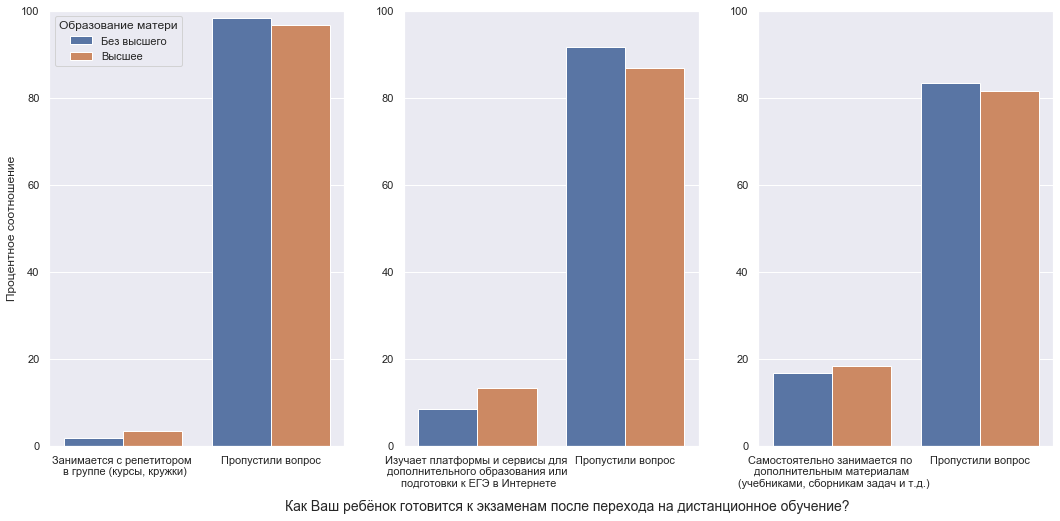

In [458]:
#9 Вопрос 41 

fig, ax =plt.subplots(1,3)
plt.rcParams['figure.figsize'] = [18, 8]

prop_df = (data_mom_edu['q41_4']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g = sns.barplot(x='q41_4',y='Процентное соотношение',hue='q86mom_edu',data=prop_df,
               order = ['Занимается с репетитором в группе (курсы, кружки)', 'Пропустили вопрос'],
                ax=ax[0])
g.set(ylim=(0, 100))
g.legend(title='Образование матери')
g.set_xlabel('',fontsize=14)
g.set_xticklabels(['Занимается с репетитором \n в группе (курсы, кружки)', 'Пропустили вопрос'])

prop_df = (data_mom_edu['q41_5']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g1 = sns.barplot(x='q41_5',y='Процентное соотношение',hue='q86mom_edu',data=prop_df,
                 order = ['Изучает платформы и сервисы для дополнительного образования или подготовки к ЕГЭ в Интернете', 'Пропустили вопрос'],
                 ax=ax[1])
g1.set(ylim=(0, 100))

g1.legend(title='Образование матери')
g1.set_xlabel(' ',fontsize=16)
g1.set_xticklabels(['Изучает платформы и сервисы для \n дополнительного образования или \n подготовки к ЕГЭ в Интернете', 'Пропустили вопрос', ])
g1.set_ylabel('') 
g1.legend_.remove()

prop_df = (data_mom_edu['q41_6']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g2 = sns.barplot(x='q41_6',y='Процентное соотношение',hue='q86mom_edu',data=prop_df,
                 order = ['Самостоятельно занимается по дополнительным материалам (учебниками, сборникам задач и т.д.)', 'Пропустили вопрос'],
                 ax=ax[2])
g2.set(ylim=(0, 100))
g2.legend(title='Образование матери')
g2.set_xlabel('',fontsize=14)
g2.set_xticklabels(['Самостоятельно занимается по \n дополнительным материалам \n (учебниками, сборникам задач и т.д.)', 'Пропустили вопрос', ])
g2.set_ylabel('') 
g2.legend_.remove()
plt.text(-3.7,-15,'Как Ваш ребёнок готовится к экзаменам после перехода на дистанционное обучение?',fontsize=14)

In [462]:
data_mom_edu.iloc[0:3,171:189]

,q34_1,q34_2,q34_3,q34_4,q34_5,q34_6,q34_7,q34_8,q34_9,q34_10,q34_11,q34_12,q34other1,q34other2,q34other3,q35_1,q35_2,q35_3
2,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Технические сбои платформ дистанционного обучения,Технические проблемы с электронными устройствами,Технические проблемы с интернетом,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Полностью согласен/-сна,Отчасти согласен/-сна,Отчасти не согласен/-сна
3,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Не испытываю трудностей,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Полностью согласен/-сна,Полностью согласен/-сна,Полностью не согласен/-сна
4,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Технические сбои платформ дистанционного обучения,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Эмоциональное перенапряжение при работе с ребе...,Пропустили вопрос,Ребенок и другие члены семьи мешают друг другу...,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Полностью согласен/-сна,Отчасти согласен/-сна,Отчасти не согласен/-сна


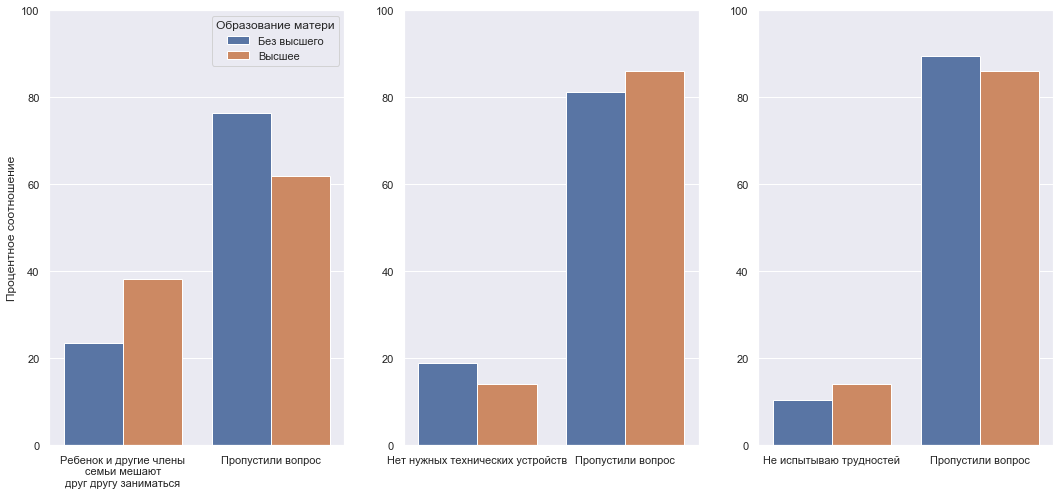

In [473]:
#10 Вопрос 34 (1)

fig, ax =plt.subplots(1,3)
plt.rcParams['figure.figsize'] = [18, 8]

prop_df = (data_mom_edu['q34_10']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g = sns.barplot(x='q34_10',y='Процентное соотношение',hue='q86mom_edu',data=prop_df,
               order = ['Ребенок и другие члены семьи мешают друг другу заниматься', 'Пропустили вопрос'],
                ax=ax[0])
g.set(ylim=(0, 100))
g.legend(title='Образование матери')
g.set_xlabel('',fontsize=14)
g.set_xticklabels(['Ребенок и другие члены\n семьи мешают \nдруг другу заниматься', 'Пропустили вопрос'])

prop_df = (data_mom_edu['q34_11']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g1 = sns.barplot(x='q34_11',y='Процентное соотношение',hue='q86mom_edu',data=prop_df,
                 order = ['Нет нужных технических устройств', 'Пропустили вопрос'],
                 ax=ax[1])
g1.set(ylim=(0, 100))

g1.legend(title='Образование матери')
g1.set_xlabel(' ',fontsize=16)
g1.set_xticklabels(['Нет нужных технических устройств', 'Пропустили вопрос', ])
g1.set_ylabel('') 
g1.legend_.remove()

prop_df = (data_mom_edu['q34_12']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g2 = sns.barplot(x='q34_12',y='Процентное соотношение',hue='q86mom_edu',data=prop_df,
                 order = ['Не испытываю трудностей', 'Пропустили вопрос'],
                 ax=ax[2])
g2.set(ylim=(0, 100))
g2.legend(title='Образование матери')
g2.set_xlabel('',fontsize=14)
g2.set_xticklabels(['Не испытываю трудностей', 'Пропустили вопрос', ])
g2.set_ylabel('') 
g2.legend_.remove()


In [482]:
data_mom_edu.iloc[0:3,200:220]

,q38sport,q38lang,q38art,q38science,q38vuz,q38other,q38no,q38other2,q38other3,q39_1,q39_2,q39_3,q39_4,q39other,q39no,q39other2,q40,q41_1,q41_2,q41_3
2,Спорт,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Занимается самостоятельно,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Да,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос
3,Пропустили вопрос,Иностранные языки,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Работает с преподавателемпреподавателями диста...,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Да,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос
4,Пропустили вопрос,Пропустили вопрос,"Танцы, музыка, театр, изобразительные искусств",Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Работает с преподавателемпреподавателями диста...,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Нет,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос


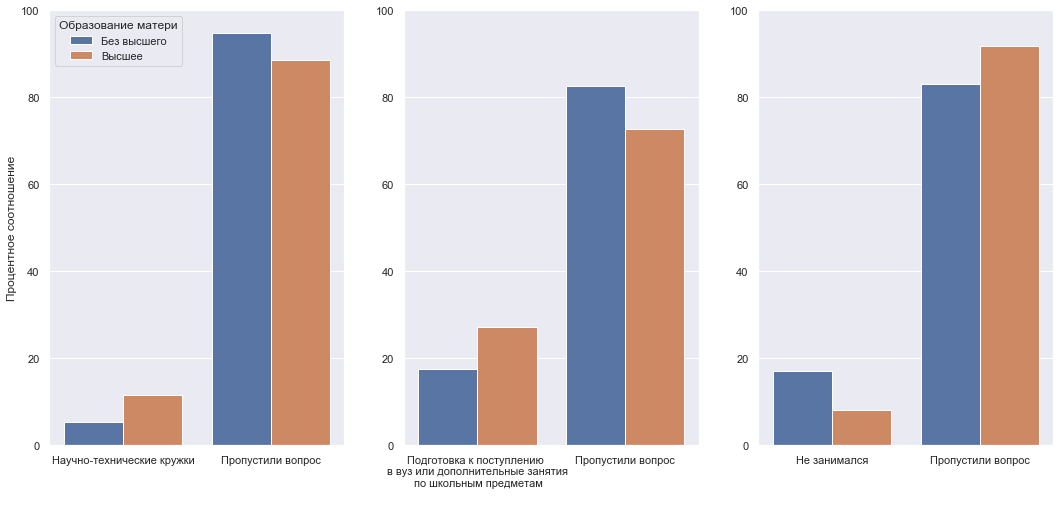

In [486]:
#10 Вопрос 38 (1)

fig, ax =plt.subplots(1,3)
plt.rcParams['figure.figsize'] = [18, 8]

prop_df = (data_mom_edu['q38science']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g = sns.barplot(x='q38science',y='Процентное соотношение',hue='q86mom_edu',data=prop_df,
               order = ['Научно-технические кружки', 'Пропустили вопрос'],
                ax=ax[0])
g.set(ylim=(0, 100))
g.legend(title='Образование матери')
g.set_xlabel('',fontsize=14)
g.set_xticklabels(['Научно-технические кружки', 'Пропустили вопрос'])

prop_df = (data_mom_edu['q38vuz']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g1 = sns.barplot(x='q38vuz',y='Процентное соотношение',hue='q86mom_edu',data=prop_df,
                 order = ['Подготовка к поступлению в вуз или дополнительные занятия по школьным предметам', 'Пропустили вопрос'],
                 ax=ax[1])
g1.set(ylim=(0, 100))

g1.legend(title='Образование матери')
g1.set_xlabel(' ',fontsize=16)
g1.set_xticklabels(['Подготовка к поступлению \n в вуз или дополнительные занятия \n по школьным предметам', 'Пропустили вопрос', ])
g1.set_ylabel('') 
g1.legend_.remove()

prop_df = (data_mom_edu['q38no']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g2 = sns.barplot(x='q38no',y='Процентное соотношение',hue='q86mom_edu',data=prop_df,
                 order = ['Не занимался', 'Пропустили вопрос'],
                 ax=ax[2])
g2.set(ylim=(0, 100))
g2.legend(title='Образование матери')
g2.set_xlabel('',fontsize=14)
g2.set_xticklabels(['Не занимался', 'Пропустили вопрос', ])
g2.set_ylabel('') 
g2.legend_.remove()


In [487]:
data_mom_edu.iloc[0:3,200:220]

,q38sport,q38lang,q38art,q38science,q38vuz,q38other,q38no,q38other2,q38other3,q39_1,q39_2,q39_3,q39_4,q39other,q39no,q39other2,q40,q41_1,q41_2,q41_3
2,Спорт,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Занимается самостоятельно,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Да,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос
3,Пропустили вопрос,Иностранные языки,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Работает с преподавателемпреподавателями диста...,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Да,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос
4,Пропустили вопрос,Пропустили вопрос,"Танцы, музыка, театр, изобразительные искусств",Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Работает с преподавателемпреподавателями диста...,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Нет,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос


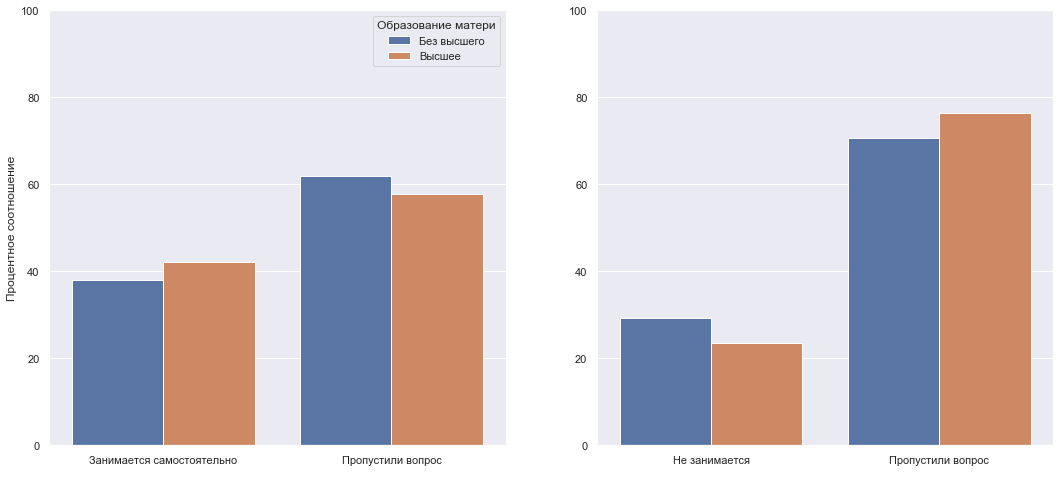

In [495]:
#10 Вопрос 39 (2)

fig, ax =plt.subplots(1,2)
plt.rcParams['figure.figsize'] = [18, 8]

prop_df = (data_mom_edu['q39_4']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g = sns.barplot(x='q39_4',y='Процентное соотношение',hue='q86mom_edu',data=prop_df,
               order = ['Занимается самостоятельно', 'Пропустили вопрос'],
                ax=ax[0])
g.set(ylim=(0, 100))
g.legend(title='Образование матери')
g.set_xlabel('',fontsize=14)
g.set_xticklabels(['Занимается самостоятельно', 'Пропустили вопрос'])

prop_df = (data_mom_edu['q39no']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g1 = sns.barplot(x='q39no',y='Процентное соотношение',hue='q86mom_edu',data=prop_df,
                 order = ['Не занимается', 'Пропустили вопрос'],
                 ax=ax[1])
g1.set(ylim=(0, 100))

g1.legend(title='Образование матери')
g1.set_xlabel(' ',fontsize=16)
g1.set_xticklabels(['Не занимается', 'Пропустили вопрос', ])
g1.set_ylabel('') 
g1.legend_.remove()



In [496]:
data_mom_edu['q39no'].value_counts()

Пропустили вопрос    1069
Не занимается         347
Name: q39no, dtype: int64